<a href="https://colab.research.google.com/github/darshit1809/-Feedback-Form/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
load data from this files

Here is all the data you need:
"bank-full.csv"

## Data loading

### Subtask:
Load the data from "bank-full.csv" into a Pandas DataFrame.


**Reasoning**:
Load the data from "bank-full.csv" into a pandas DataFrame and display the first 5 rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('bank-full.csv', sep=';')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'bank-full.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


(45211, 17)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, and examine the distribution of variables.


**Reasoning**:
I need to explore the data types, missing values, and distributions of variables in the dataframe.



Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Percentage of Missing Values:
 age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

Descriptiv

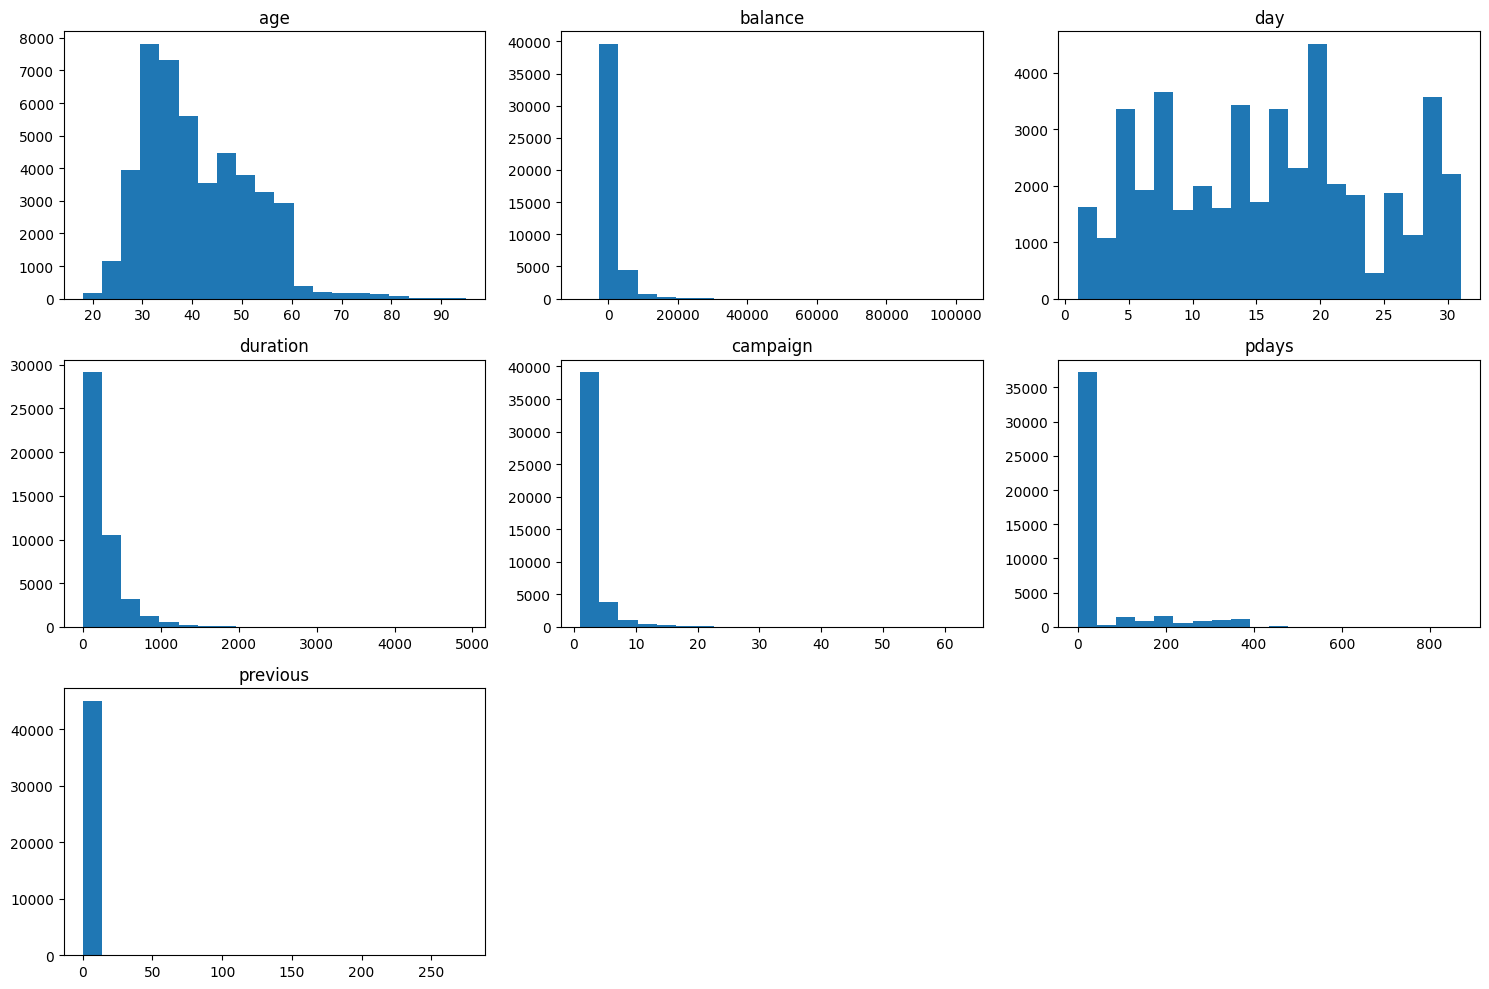


Value Counts for job:
 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


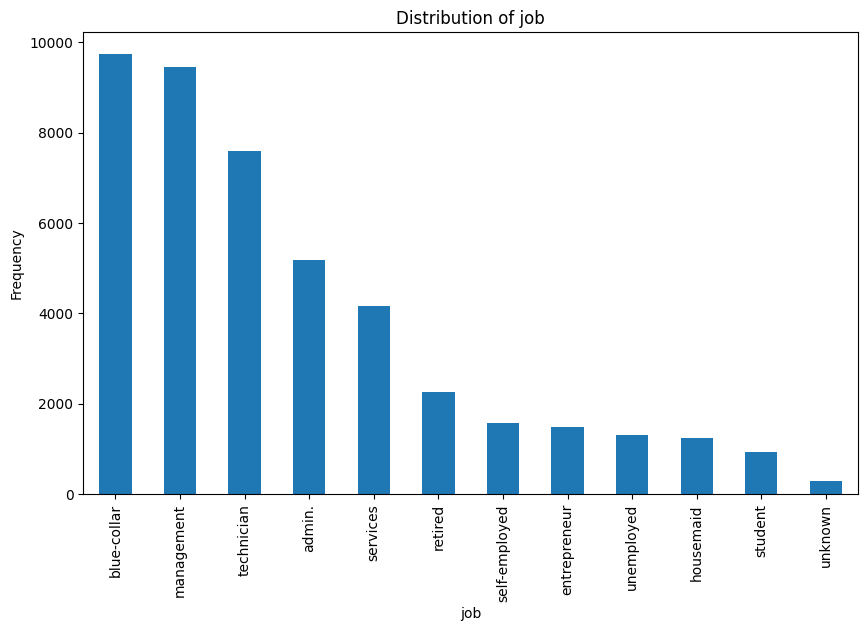


Value Counts for marital:
 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


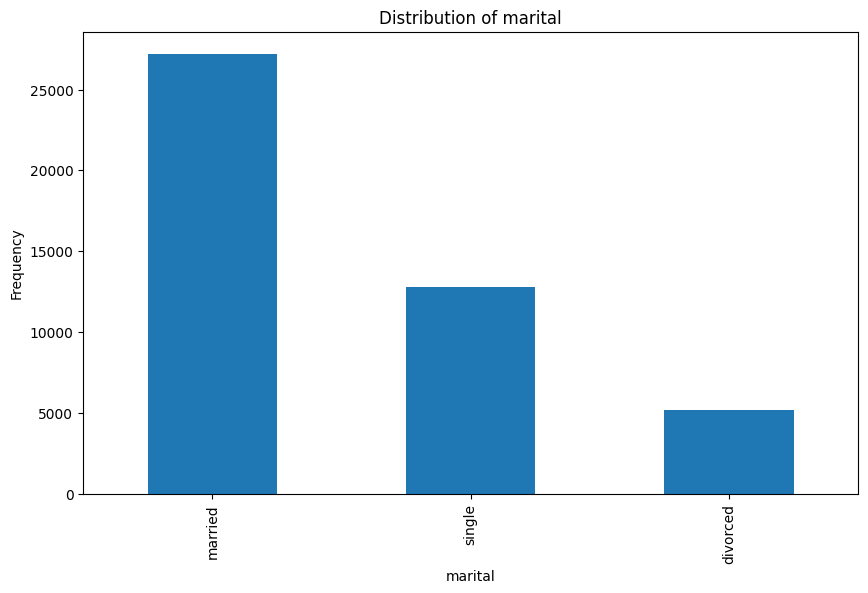


Value Counts for education:
 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


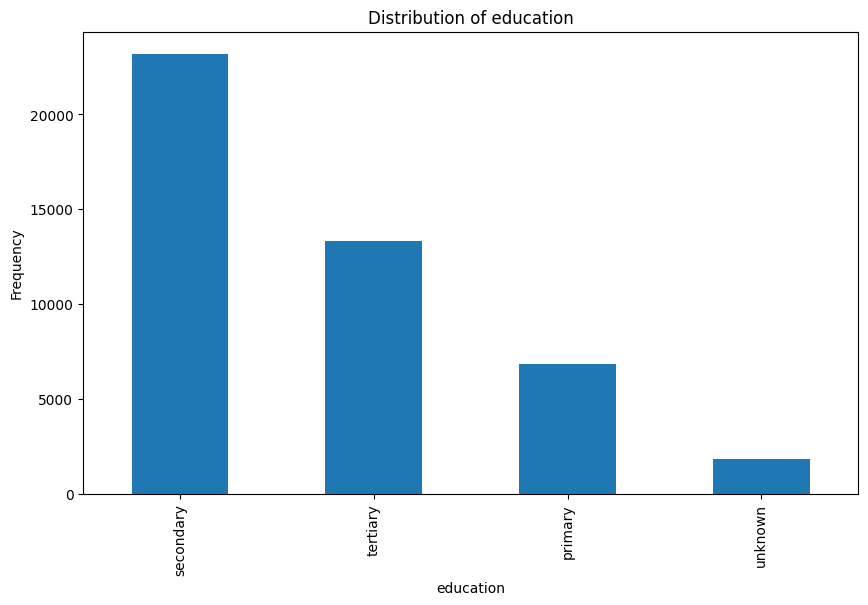


Value Counts for default:
 default
no     44396
yes      815
Name: count, dtype: int64


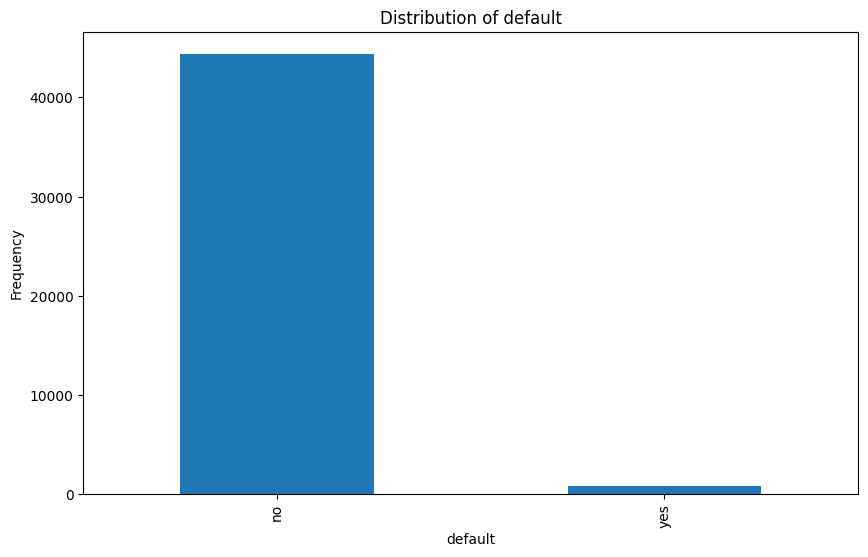


Value Counts for housing:
 housing
yes    25130
no     20081
Name: count, dtype: int64


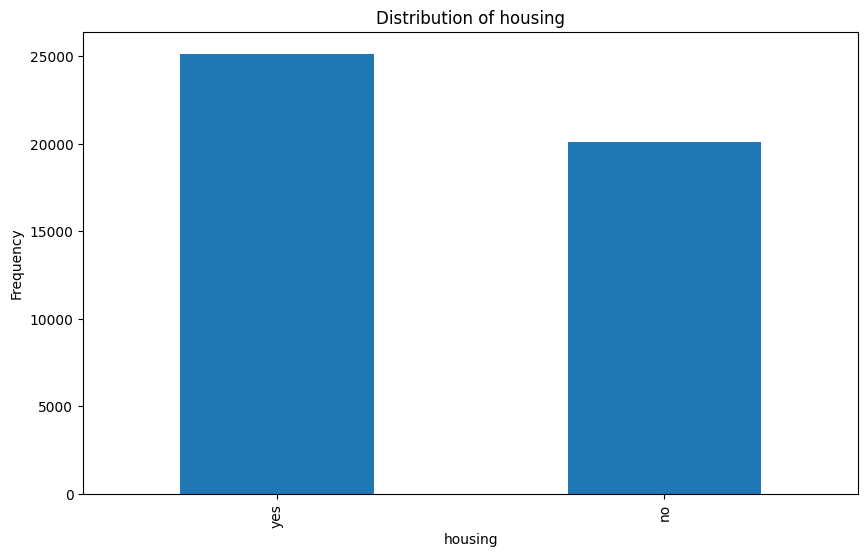


Value Counts for loan:
 loan
no     37967
yes     7244
Name: count, dtype: int64


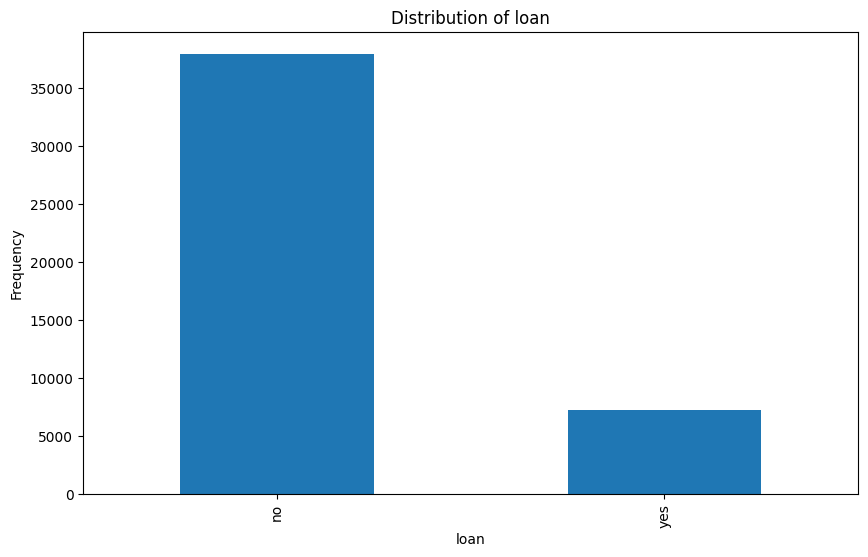


Value Counts for contact:
 contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


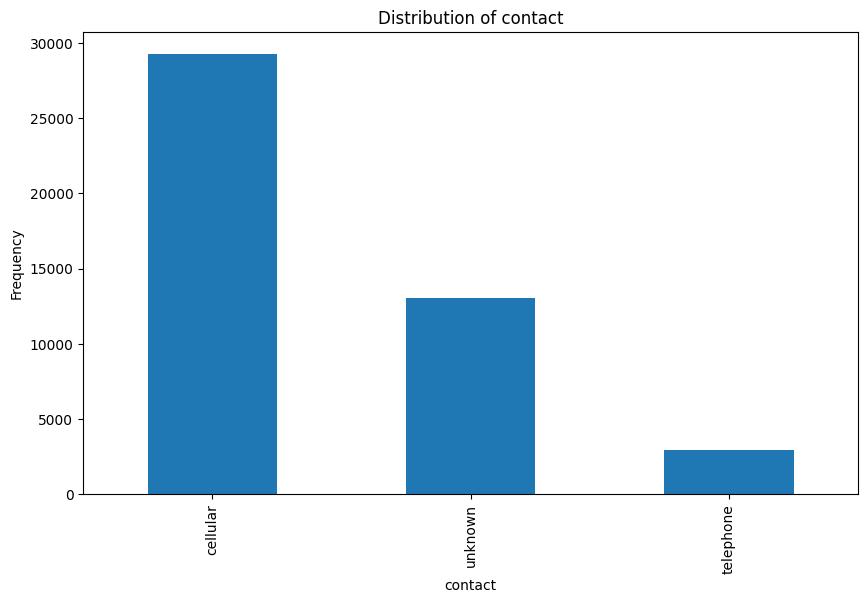


Value Counts for month:
 month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


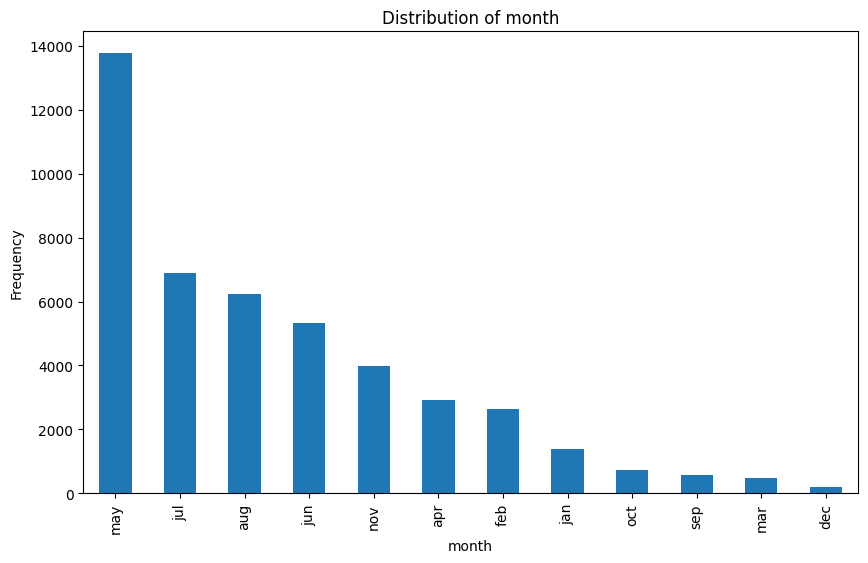


Value Counts for poutcome:
 poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


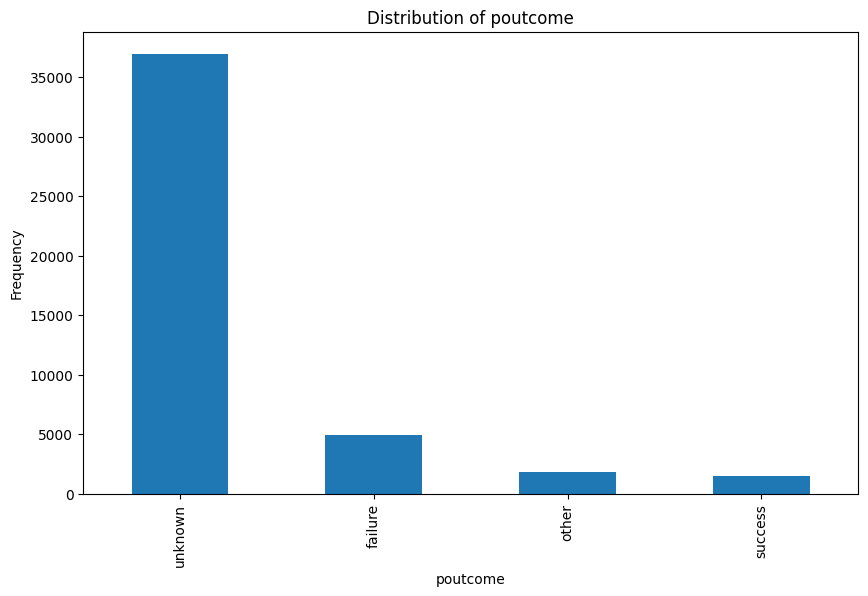


Value Counts for y:
 y
no     39922
yes     5289
Name: count, dtype: int64


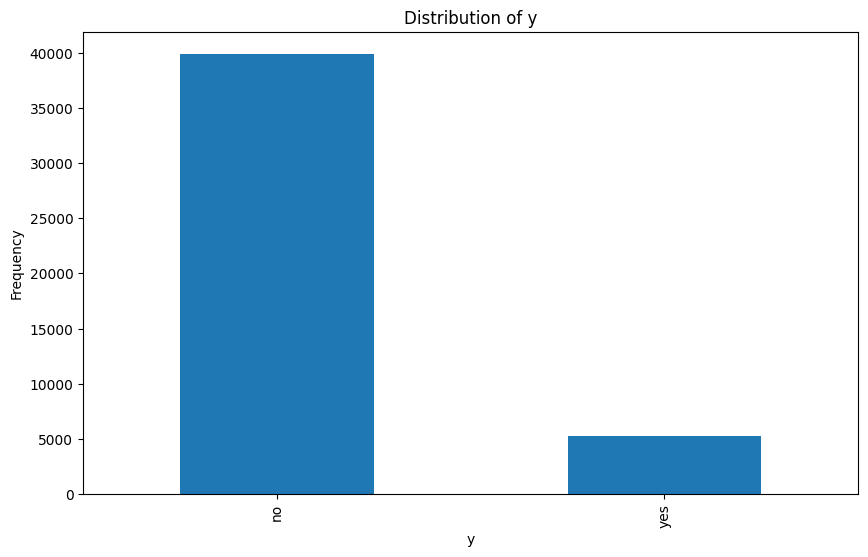


Correlation Matrix:
                age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


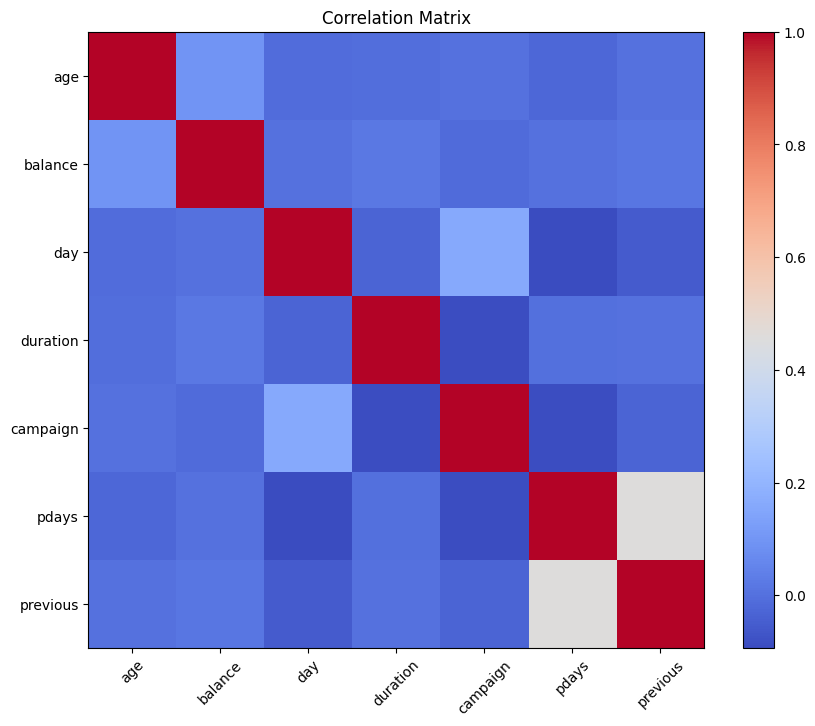

In [ ]:
# Data Types
print("Data Types:\n", df.dtypes)

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)

# Descriptive Statistics for Numerical Features
numerical_features = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:\n", numerical_features.describe())

# Distribution of Numerical Features
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[col], bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()


# Distribution of Categorical Features
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Correlation Matrix for Numerical Features
correlation_matrix = numerical_features.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies or outliers.


**Reasoning**:
Clean the data by handling inconsistencies or outliers in 'balance' and 'duration', and examine categorical features for inconsistencies.



education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Descriptive Statistics for Numerical Features after cleaning:
                 age       balance           day      duration      campaign  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210   1116.990843     15.806419    242.220787      2.763841   
std       10.618762   1581.303636      8.322476    191.849581      3.098021   
min       18.000000   -172.000000      1.000000     35.000000      1.000000   
25%       33.000000     72.000000      8.000000    103.000000      1.000000   
50%       39.000000    448.000000     16.000000    180.000000      2.000000   
75%       48.000000   1428.000000     21.000000    319.000000      3.000000   
max       95.000000   5768.000000     31.000000    751.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std 

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

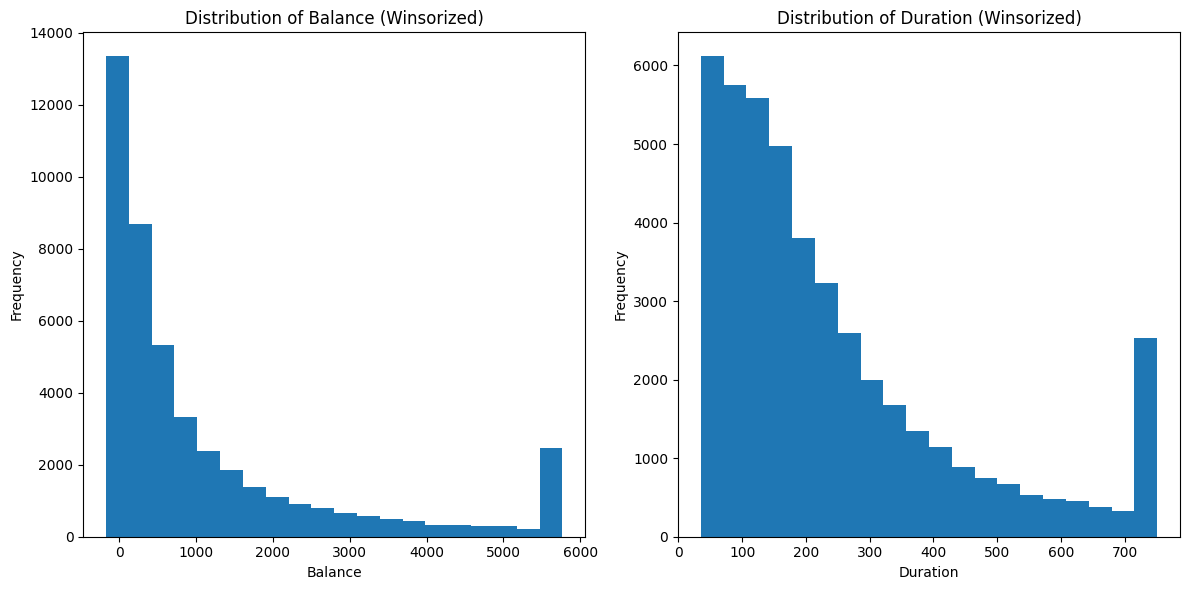

In [ ]:
import matplotlib.pyplot as plt

# Winsorize 'balance' and 'duration'
from scipy.stats.mstats import winsorize
df['balance'] = winsorize(df['balance'], limits=[0.05, 0.05])
df['duration'] = winsorize(df['duration'], limits=[0.05, 0.05])

# Check for inconsistencies in categorical features and correct them.
# Example: Check for misspellings in 'education'
print(df['education'].value_counts())
# If there were misspellings, you would correct them here.  For example:
# df['education'] = df['education'].replace({'basic.6y':'basic','basic.9y':'basic','basic.4y':'basic'})


# Display descriptive statistics after cleaning
numerical_features = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features after cleaning:\n", numerical_features.describe())

# Plot the distributions of 'balance' and 'duration' after winsorizing
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['balance'], bins=20)
plt.title('Distribution of Balance (Winsorized)')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['duration'], bins=20)
plt.title('Distribution of Duration (Winsorized)')
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Summary:

### Q&A
No questions were posed in the task.

### Data Analysis Key Findings
* The dataset, "bank-full.csv", contains 45,211 rows and 17 columns.
* No missing values were found in the dataset.
* Outliers in the 'balance' and 'duration' columns were handled using winsorization, limiting extreme values to the 5th and 95th percentiles.
* The 'education' column was checked for inconsistencies, with a commented-out example demonstrating how to handle misspellings.
* The 'y' column (target variable) shows a class imbalance, with 'no' significantly outnumbering 'yes'.  (Observed in the data exploration step)
* Histograms revealed potential outliers in the 'balance' and 'duration' columns before winsorization.

### Insights or Next Steps
* Investigate the class imbalance in the target variable ('y') and consider techniques like oversampling or undersampling to improve model performance.
* Explore the relationships between features and the target variable more deeply, potentially using scatterplots or other visualizations for numerical and categorical variables.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assuming 'df' is already loaded from 'bank-full.csv' as in your notebook

# Prepare the data
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

# Separate features (X) and target variable (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0) # Convert 'yes'/'no' to 1/0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7366  586]
 [ 568  523]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

X = df_encoded.drop('y', axis=1)
y = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7366  586]
 [ 568  523]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



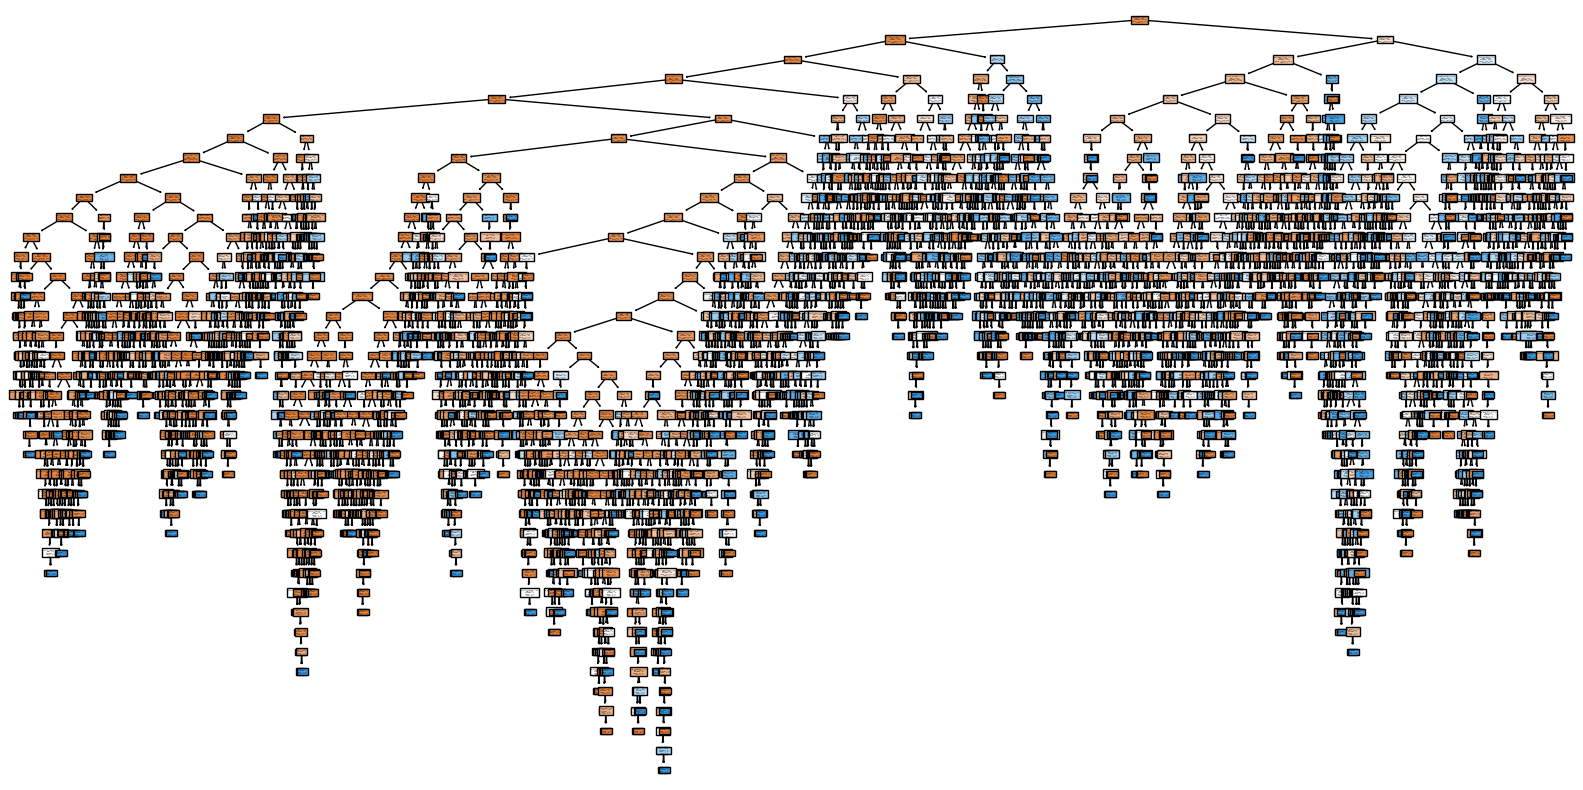

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

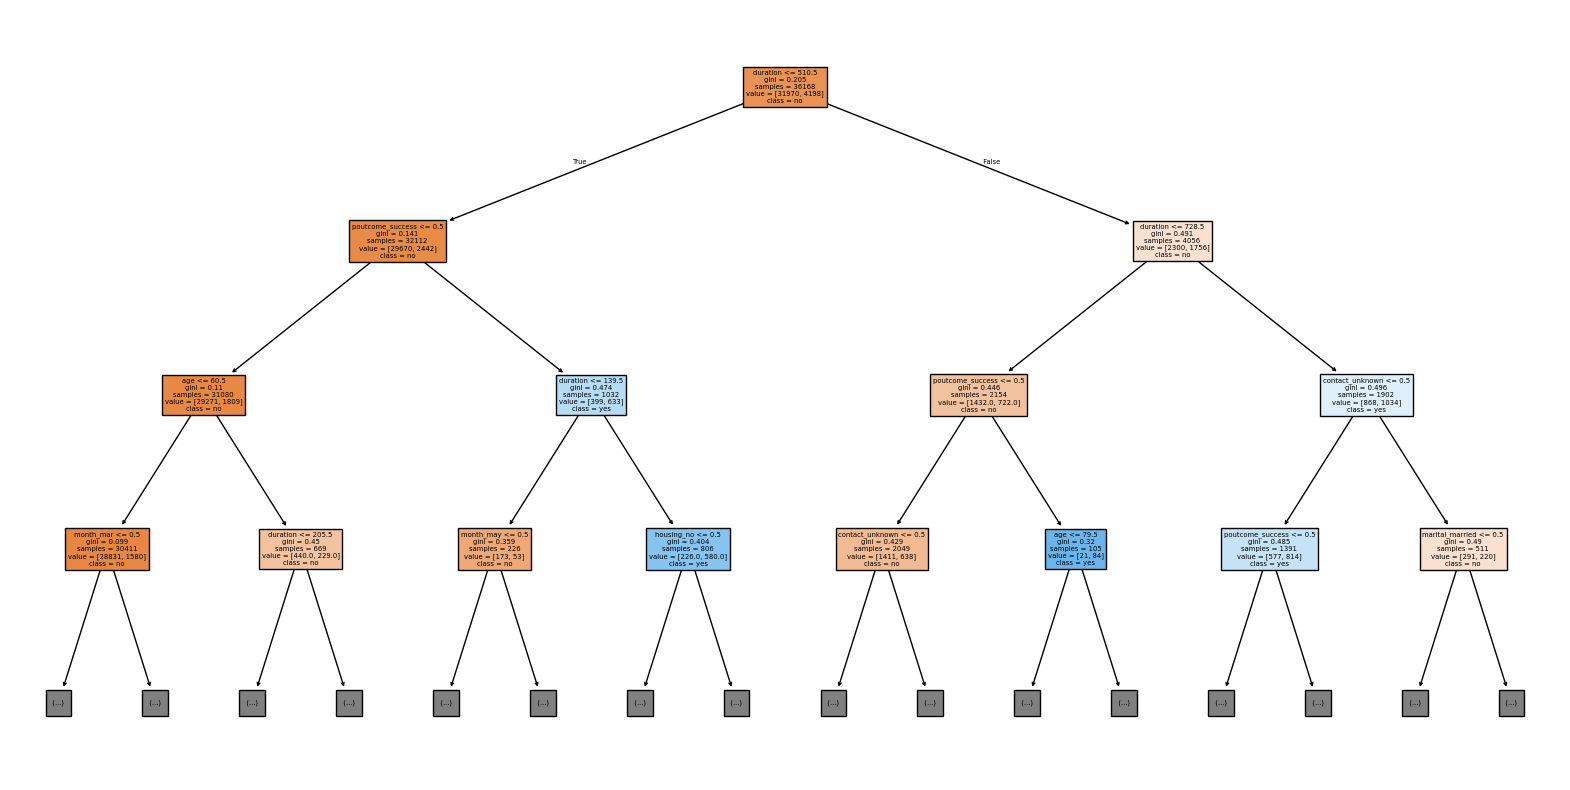

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['no', 'yes'], filled=True, max_depth=3) # Set max_depth to 3 (or another small number)
plt.show()